In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

In [2]:
df = pd.read_csv("retail_sales_dummy_dataset.csv", parse_dates=["Order_Date"])

df.head()

,Order_ID,Order_Date,Region,Product,Category,Quantity,Unit_Price,Discount,Revenue,Cost,Profit,Sales_Channel
0,1,2023-07-14,East,Tablet,Electronics,2,400,0.00,800.0,480.0,320.0,Online
1,2,2023-08-21,North,Headphones,Accessories,4,150,0.10,540.0,360.0,180.0,Online
2,3,2023-09-03,South,Headphones,Accessories,2,150,0.15,255.0,180.0,75.0,In-Store
3,4,2023-01-25,West,Laptop,Electronics,1,800,0.15,680.0,480.0,200.0,In-Store
4,5,2023-01-10,South,Headphones,Accessories,5,150,0.00,750.0,450.0,300.0,Online


In [3]:
df.info()
df.describe()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Order_ID       1000 non-null   int64         
 1   Order_Date     1000 non-null   datetime64[ns]
 2   Region         1000 non-null   object        
 3   Product        1000 non-null   object        
 4   Category       1000 non-null   object        
 5   Quantity       1000 non-null   int64         
 6   Unit_Price     1000 non-null   int64         
 7   Discount       1000 non-null   float64       
 8   Revenue        1000 non-null   float64       
 9   Cost           1000 non-null   float64       
 10  Profit         1000 non-null   float64       
 11  Sales_Channel  1000 non-null   object        
dtypes: datetime64[ns](1), float64(4), int64(3), object(4)
memory usage: 93.9+ KB


Order_ID         0
Order_Date       0
Region           0
Product          0
Category         0
Quantity         0
Unit_Price       0
Discount         0
Revenue          0
Cost             0
Profit           0
Sales_Channel    0
dtype: int64

In [4]:
df["Month"] = df["Order_Date"].dt.month
df["Month_Name"] = df["Order_Date"].dt.month_name()
df["Year"] = df["Order_Date"].dt.year
df["Profit_Margin"] = df["Profit"] / df["Revenue"]

In [5]:
total_revenue = df["Revenue"].sum()
total_profit = df["Profit"].sum()

print("Total Revenue:", total_revenue)
print("Total Profit:", total_profit)

Total Revenue: 1233805.0
Total Profit: 432295.0


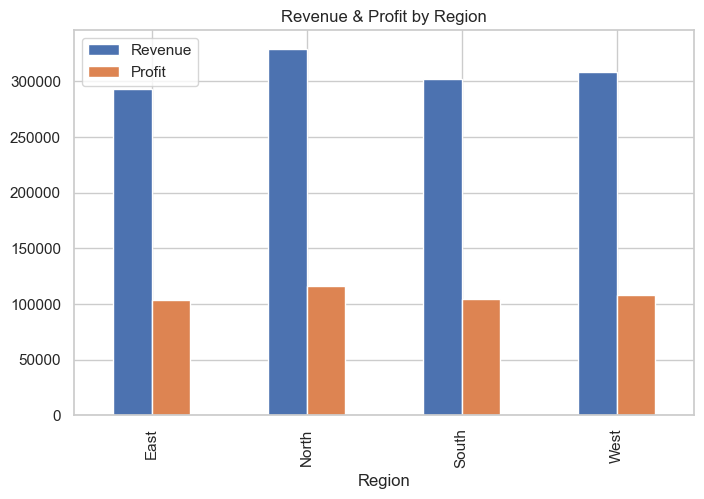

In [6]:
region_sales = df.groupby("Region")[["Revenue", "Profit"]].sum()

region_sales.plot(kind="bar", figsize=(8,5))
plt.title("Revenue & Profit by Region")
plt.show()

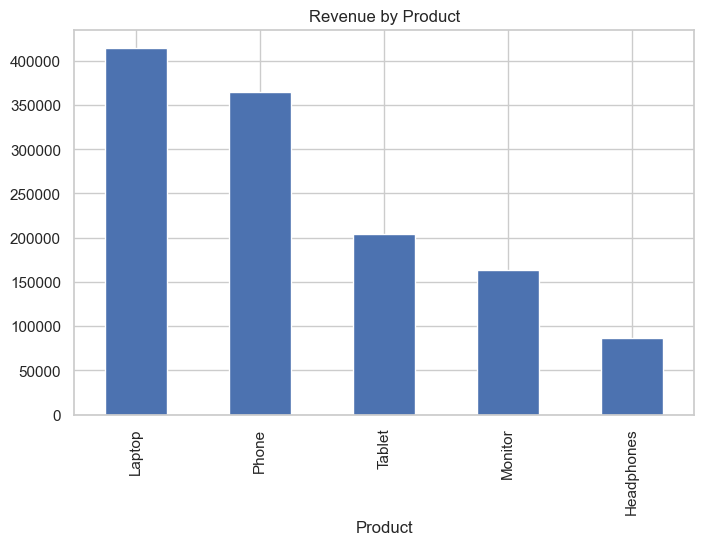

In [7]:
product_sales = df.groupby("Product")["Revenue"].sum().sort_values(ascending=False)

product_sales.plot(kind="bar", figsize=(8,5))
plt.title("Revenue by Product")
plt.show()

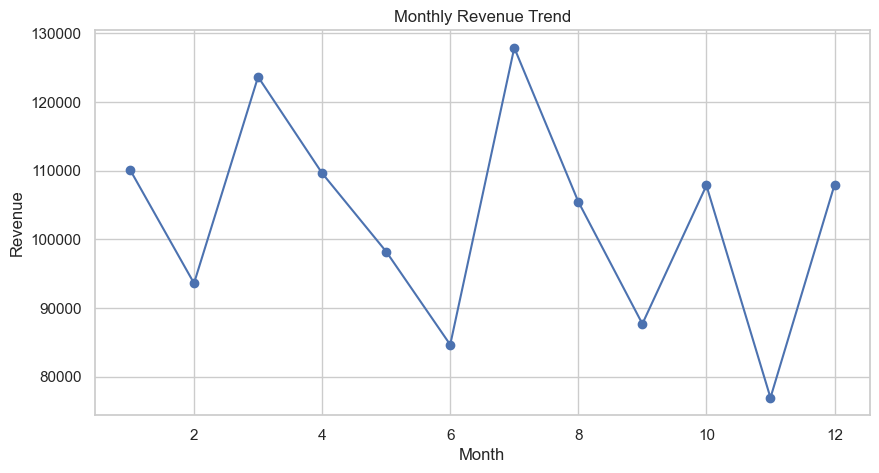

In [8]:
monthly_sales = df.groupby("Month")["Revenue"].sum()

plt.figure(figsize=(10,5))
monthly_sales.plot(marker='o')
plt.title("Monthly Revenue Trend")
plt.xlabel("Month")
plt.ylabel("Revenue")
plt.show()

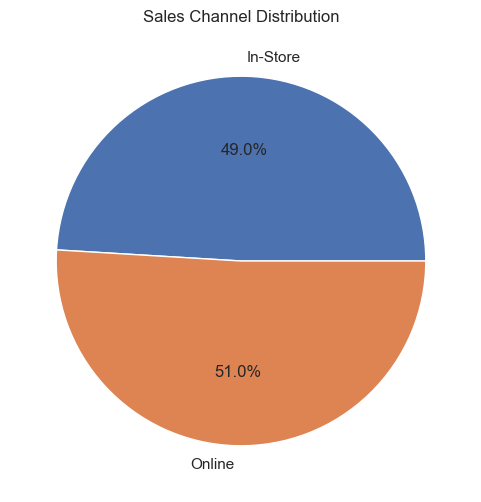

In [9]:
channel_sales = df.groupby("Sales_Channel")["Revenue"].sum()

channel_sales.plot(kind="pie", autopct="%1.1f%%", figsize=(6,6))
plt.title("Sales Channel Distribution")
plt.ylabel("")
plt.show()

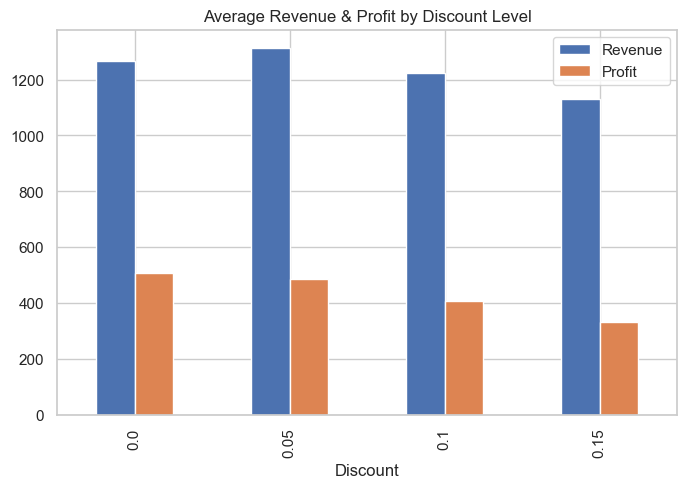

In [10]:
discount_analysis = df.groupby("Discount")[["Revenue", "Profit"]].mean()

discount_analysis.plot(kind="bar", figsize=(8,5))
plt.title("Average Revenue & Profit by Discount Level")
plt.show()

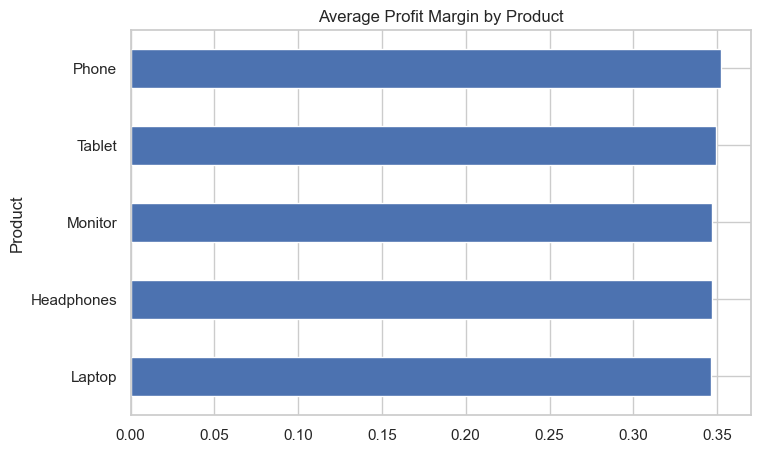

In [11]:
margin = df.groupby("Product")["Profit_Margin"].mean().sort_values()

margin.plot(kind="barh", figsize=(8,5))
plt.title("Average Profit Margin by Product")
plt.show()